# Notebook de Segmentation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-librairies" data-toc-modified-id="Importation-des-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des librairies</a></span></li><li><span><a href="#Visualisation-des-performances-:-Réduction-dimensionnelle-avec-TSNE" data-toc-modified-id="Visualisation-des-performances-:-Réduction-dimensionnelle-avec-TSNE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualisation des performances : Réduction dimensionnelle avec TSNE</a></span></li><li><span><a href="#Modélisations" data-toc-modified-id="Modélisations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modélisations</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li><li><span><a href="#Interprétation-des-clusters" data-toc-modified-id="Interprétation-des-clusters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interprétation des clusters</a></span><ul class="toc-item"><li><span><a href="#Personnes-types" data-toc-modified-id="Personnes-types-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Personnes types</a></span></li></ul></li><li><span><a href="#Maintenance-de-l'algorithme" data-toc-modified-id="Maintenance-de-l'algorithme-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Maintenance de l'algorithme</a></span></li></ul></div>

## Importation des librairies

In [74]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler

Chargement des données :

In [10]:
data_clients = pd.read_csv('customers_clustering_df.csv')

Nous retirons les lignes contenant des infos manquantes.

In [11]:
data_clust = data_clients.iloc[:,1:].dropna()
variable_names = data_clust.columns
print(data_clust.shape)
data_clust

(95944, 5)


,avg_orders_price,avg_review_score,payment_installments,cat_score,last_order
0,141.90,5.0,8.0,10370.0,116.0
1,27.19,4.0,1.0,12587.0,119.0
2,86.22,3.0,8.0,2309.0,542.0
3,43.62,4.0,4.0,3237.0,326.0
4,196.89,5.0,6.0,3237.0,293.0
...,...,...,...,...,...
96091,2067.42,5.0,10.0,12587.0,452.0
96092,84.58,4.0,1.0,4118.0,267.0
96093,112.46,5.0,1.0,5927.0,573.0
96094,133.69,5.0,5.0,12050.0,124.0


Scalage des données :

In [19]:
scaler = StandardScaler()
data = scaler.fit_transform(data_clust)
print(data)

[[-0.07634761  0.68672388  1.90312343  0.98294697 -0.83254036]
 [-0.59971179 -0.0529405  -0.71046509  1.54601408 -0.81296479]
 [-0.33038752 -0.79260488  1.90312343 -1.06436201  1.94719059]
 ...
 [-0.21066756  0.68672388 -0.71046509 -0.14547305  2.14947148]
 [-0.11380572  0.68672388  0.78301407  1.40962841 -0.78033884]
 [-0.39727374  0.68672388  0.40964428 -0.63717262  1.59483033]]


## Visualisation des performances : Réduction dimensionnelle avec TSNE

Après avoir préparé, nettoyé et scalé nos données nous allons maintenant appliquer des algorithmes de clustering permettant de faire la ségmentation. Ayant 5 features, il est important d'appliquer une réduction dimensionnelle sur les données pour pouvoir les exprimer sur 2 composantes. 

Nous allons utiliser pour cela la méthode **t-distributed Stochastic Neighbor Embedding (TSNE)** et jouer avec le paramètre de *perplexity* afin de trouver la meilleure visualisation possible.


In [5]:
X_tsne = TSNE(n_components=2).fit_transform(data)

In [6]:
X_tsne5 = TSNE(n_components=2, perplexity=5).fit_transform(data)

In [75]:
X_tsne50 = TSNE(n_components=2, perplexity=50).fit_transform(data)

In [8]:
X_tsne100 = TSNE(n_components=2, perplexity=100).fit_transform(data)

Visualisons désormais nos données et observons l'impact de la perplexité sur les graphiques.

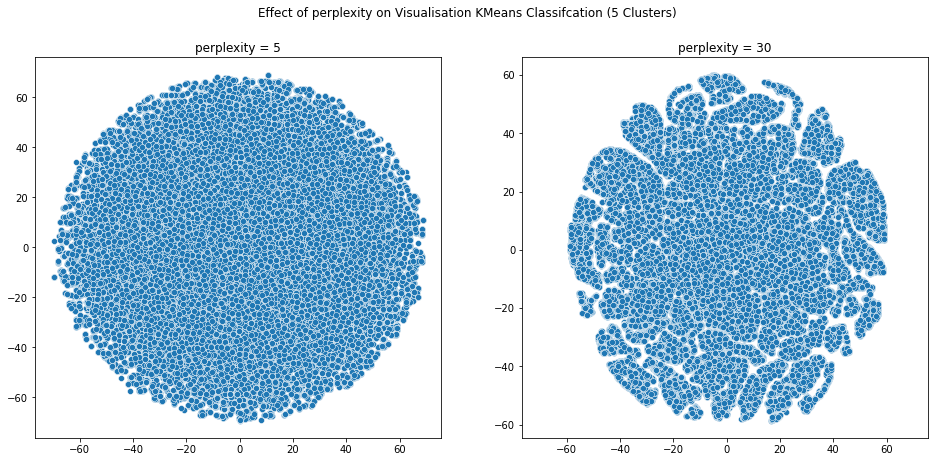

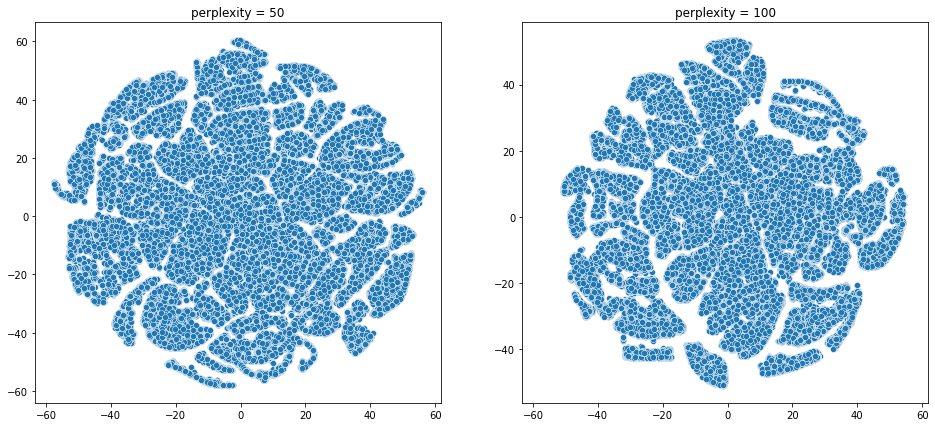

In [27]:
colors = np.array(["Red","Green","Blue","Yellow","Pink"])

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16, 7))

ax0.set_title("perplexity = 5")
sns.scatterplot(ax=ax0, data=X_tsne5 ,x=X_tsne5[:,0], y=X_tsne5[:,1])

ax1.set_title('perplexity = 30')
sns.scatterplot(ax=ax1, data=X_tsne ,x=X_tsne[:,0], y=X_tsne[:,1])

fig2, (ax2, ax3) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16, 7))

ax2.set_title('perplexity = 50')
sns.scatterplot(ax=ax2, data=X_tsne50 ,x=X_tsne50[:,0], y=X_tsne50[:,1])

ax3.set_title('perplexity = 100')
sns.scatterplot(ax=ax3, data=X_tsne100 ,x=X_tsne100[:,0], y=X_tsne100[:,1])

fig.suptitle('Effect of perplexity on Visualisation KMeans Classifcation (5 Clusters)')
plt.show()

##  Modélisations 
### KMeans

Pour l'agorithme de clustering KMeans, le challenge est de trouver notre bon nombre de groupes qui seront présents dans notre segmentation. Pour ce faire nous allous tester sur plusieurs valeurs de n_clusters afin d'observer la valeur optimale (**méthode Elbow curve**).

Wall time: 1min 27s


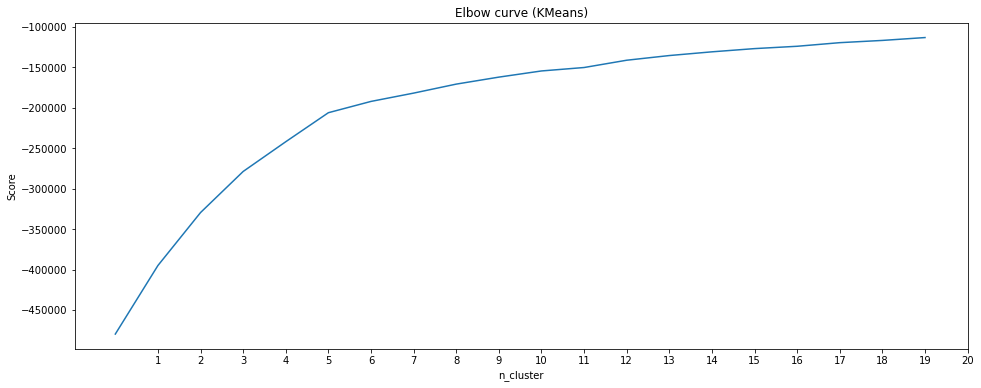

In [10]:
%%time

n_cluster = range(1,21)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.title("Elbow curve (KMeans)")
plt.xlabel('n_cluster')
plt.ylabel('Score')
plt.plot(scores)
_ = plt.xticks(n_cluster)

Nous observons sur ce graphique que la courbe présente un *coude*, ici pour n_cluster = 5. Ce nombre de cluster apparente être le plus optimal pour notre jeu de donnée.

Afin de valider ce choix par une autre méthode nous allons utiliser l'inertie, qui représente la somme des distances au carrées des clusters choisis. Plus la valeur est petite et plus les valeurs seront proches des centres des clusters.

Wall time: 1min 30s


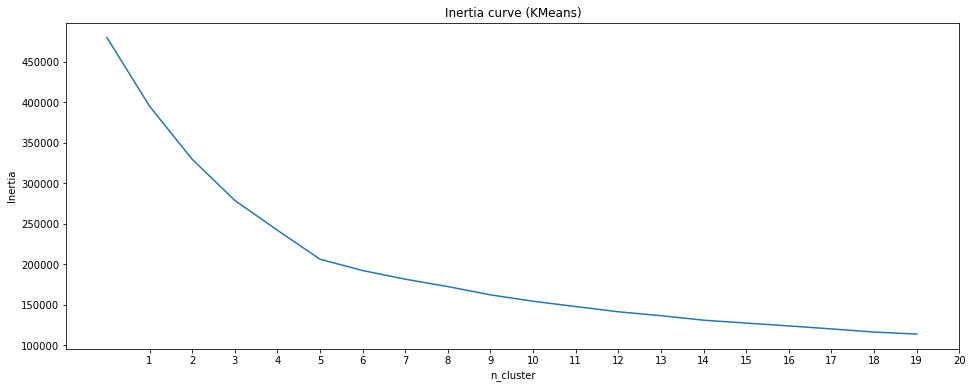

In [11]:
%%time

inertie = []
n_cluster = range(1,21)
for i in n_cluster :
    kmeans = KMeans(n_clusters=i).fit(data)
    inertie.append(kmeans.inertia_)

f = plt.figure(1, figsize=(16,6))
plt.title("Inertia curve (KMeans)")
plt.xlabel('n_cluster')
plt.ylabel('Inertia')
plt.plot(inertie)
_ = plt.xticks(n_cluster)

Nous observons sur le graphique d'Inertie que la courbe a aussi un *coude*, ici pour **n_cluster = 5**. Cela nous permet de confirmer le chox du nombre de cluster que nous allons viser avec cet algorithme. 

Il existe une autre méthode de choix des clusters qui est avec le **silhouette_score** qui permet de calculer la moyenne des coefficients de silhouette de chaque clusters (rapport de distances intra & inter-clusters). Pour des soucis de temps d'exécution nous décidons de l'écarter.   

In [12]:
%%time

km = KMeans(n_clusters=5)
print(silhouette_score(data, km.fit_predict(data)))

0.24673008987542688
Wall time: 1min 32s


Construction du modèle **KMeans** avec le nombre de clusters choisis : 5

In [20]:
clustering = KMeans(init="random",
                    n_clusters=5,
                    n_init=10,
                    max_iter=300,
                    random_state=42)
clustering.fit(data)
print(clustering.n_iter_)
print(clustering.cluster_centers_)

14
[[-0.19614961  0.37217967 -0.24464802 -0.09304429  1.26975454]
 [ 1.2716416   0.05227478  2.09827114  0.084269    0.08149565]
 [-0.07790372 -2.03548237 -0.16026584 -0.03236592  0.02058527]
 [-0.14988218  0.37706791 -0.28389583  1.02410786 -0.51797675]
 [-0.21298583  0.3946859  -0.36426201 -0.85369435 -0.57355256]]


Text(0.5, 1.0, 'Visualisation KMeans Classifcation (5 Clusters)')

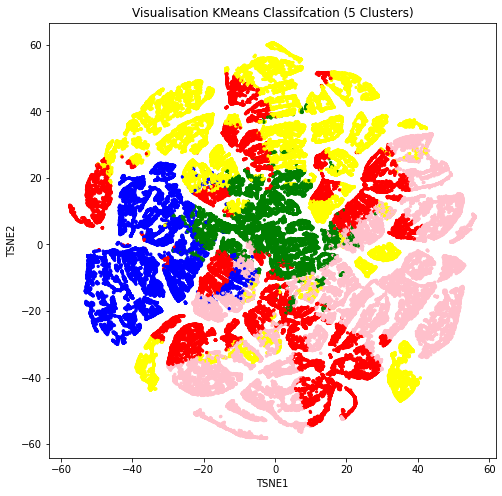

In [37]:
colors = np.array(["Red","Green","Blue","Yellow","Pink"])

plt.figure(figsize=(8,8))

plt.scatter(x=X_tsne50[:,0], y=X_tsne50[:,1], c = colors[clustering.labels_],s=5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("Visualisation KMeans Classifcation (5 Clusters)")

### DBSCAN

L'algorithme DCSAN est basé sur les variations de densités de notre dataset. La difficulté ici est de trouver notre  paramètre *epsilon* qui représente la distance entre les points de notre jeu de données. Pour ce faire il existe la méthode des K-distances qui s'appuie sur les NearestNeighbors. 

In [38]:
dbscan=DBSCAN()

In [40]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

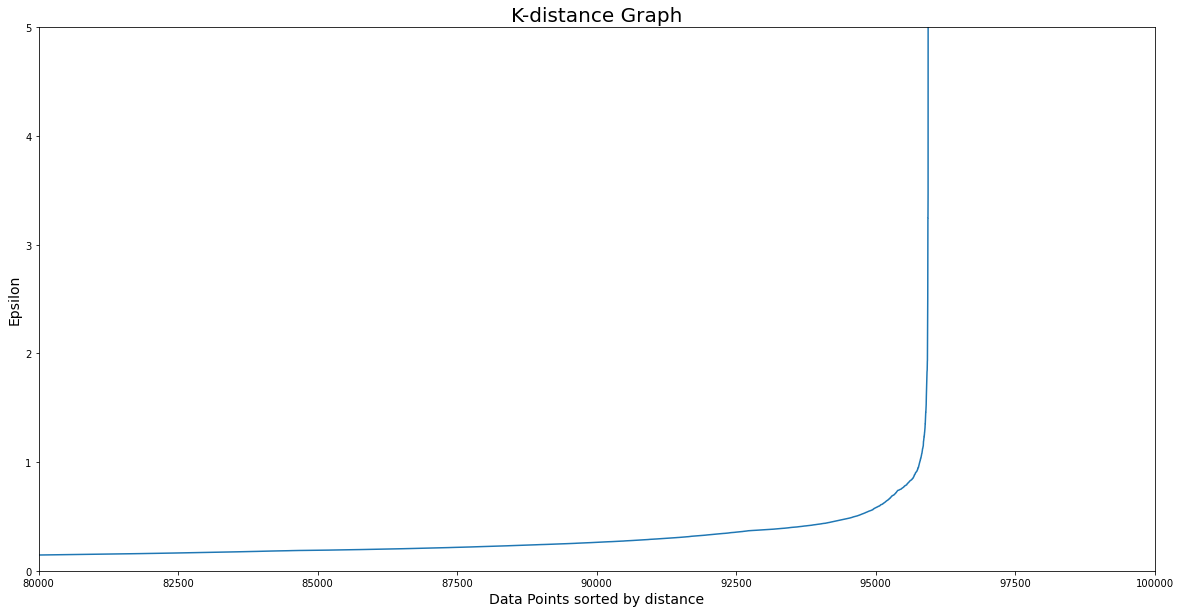

In [41]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim([80000, 100000])
plt.ylim([0, 5])
plt.show()

Le *epsilon* optimal se trouve sur le point de courbure maximale de K-Distance Graph qui est ici légèrement inférieur à 1.

In [76]:
db = DBSCAN(eps=0.8, min_samples=10).fit(data)
labels = db.labels_

In [77]:
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 1147


In [78]:
data_clust['DBSCAN_labels']=db.labels_
data_clust['DBSCAN_labels'].value_counts().head(10)

 0    94785
-1     1147
 1       12
Name: DBSCAN_labels, dtype: int64

Text(0.5, 1.0, 'Visualisation KMeans Classifcation (5 Clusters)')

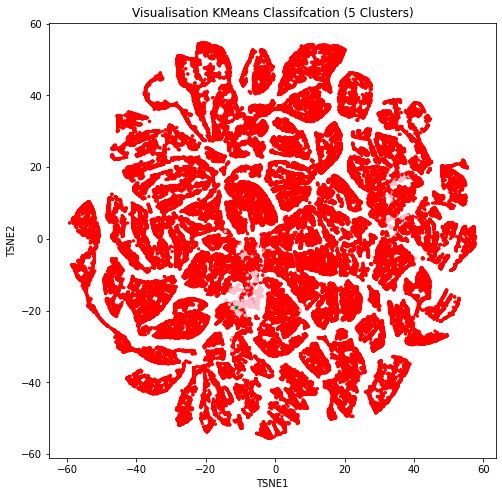

In [80]:
colors = np.array(["Red","Green","Blue","Yellow","Pink"])

plt.figure(figsize=(8,8))

plt.scatter(x=X_tsne50[:,0], y=X_tsne50[:,1], c = colors[labels],s=5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("Visualisation KMeans Classifcation (5 Clusters)")

Après avoir testé plusieurs valeurs de *epsilon*, nous remarquons que DBCSAN n'est pas adapté ici pour notre jeu de données. En effet nos points sont trop rapprochés et l'algorithme n'arrive pas à dégager des clusters clairs.

Pour la suite du projet nous garderons donc l'agorithme KMeans qui lui à montré son efficacité. 

## Interprétation des clusters

Maintenant que nous avons retenu notre modèle et que nous avons trouvé notre nombre de clusters (5), il est désormais temps d'interpréter nos résultats afin de les rendre utilisables par les équipes métiers par la suite. 

Notre client est ici une équipe Marketing et il est primordial que notre ségmentation puisse être comprise et appliquée ensuite en production. 

Nous allons regardé pour chaque clusters dégagés, quelles sont les valeurs moyennes de nos variables pour arriver à mieux comprendre cette nouvelle répartition. 

In [21]:
data_clust['cluster'] = clustering.labels_
data_clust

,avg_orders_price,avg_review_score,payment_installments,cat_score,last_order,cluster
0,141.90,5.0,8.0,10370.0,116.0,1
1,27.19,4.0,1.0,12587.0,119.0,3
2,86.22,3.0,8.0,2309.0,542.0,0
3,43.62,4.0,4.0,3237.0,326.0,0
4,196.89,5.0,6.0,3237.0,293.0,4
...,...,...,...,...,...,...
96091,2067.42,5.0,10.0,12587.0,452.0,1
96092,84.58,4.0,1.0,4118.0,267.0,4
96093,112.46,5.0,1.0,5927.0,573.0,0
96094,133.69,5.0,5.0,12050.0,124.0,3


In [73]:
new_clusters = pd.DataFrame(columns=["cluster","avg_order_price","avg_review_score","avg_payment_installments",
                                    "avg_category_score","avg_days_last_order","effectif"])
new_clusters.cluster=[0,1,2,3,4]

In [74]:
for i in data_clust.cluster.unique() :
    new_clusters.loc[new_clusters.cluster==i,"avg_order_price"] = data_clust.loc[data_clust.cluster == i, 'avg_orders_price'].mean()
    new_clusters.loc[new_clusters.cluster==i,"avg_review_score"] = data_clust.loc[data_clust.cluster == i, 'avg_review_score'].mean()
    new_clusters.loc[new_clusters.cluster==i,"avg_payment_installments"] = data_clust.loc[data_clust.cluster == i, 'payment_installments'].mean()
    new_clusters.loc[new_clusters.cluster==i,"avg_category_score"] = data_clust.loc[data_clust.cluster == i, 'cat_score'].mean()
    new_clusters.loc[new_clusters.cluster==i,"avg_days_last_order"] = data_clust.loc[data_clust.cluster == i, 'last_order'].mean()
    new_clusters.loc[new_clusters.cluster==i,"effectif"] = data_clust['cluster'].value_counts()[i]
    
new_clusters

,cluster,avg_order_price,avg_review_score,avg_payment_installments,avg_category_score,avg_days_last_order,effectif
0,0,115.655,4.57475,2.24811,6115.77,438.218,20716
1,1,437.322,4.14246,8.52218,6832.97,256.074,11286
2,2,141.567,1.31945,2.4739,6371.45,246.743,13629
3,3,125.752,4.58145,2.14173,10531.7,164.674,23678
4,4,111.937,4.60515,1.92712,3138.62,155.46,26635


In [87]:
total = new_clusters.effectif.sum()

new_clusters["effectif%"] = (new_clusters.effectif/total)*100
new_clusters = new_clusters.drop(["effectif"], axis=1)
new_clusters

,cluster,avg_order_price,avg_review_score,avg_payment_installments,avg_category_score,avg_days_last_order,effectif%
0,0,115.655,4.57475,2.24811,6115.77,438.218,21.5918
1,1,437.322,4.14246,8.52218,6832.97,256.074,11.7631
2,2,141.567,1.31945,2.4739,6371.45,246.743,14.2052
3,3,125.752,4.58145,2.14173,10531.7,164.674,24.679
4,4,111.937,4.60515,1.92712,3138.62,155.46,27.761


In [2]:
# new_clusters.to_csv('new_clusters.csv')
new_clusters = pd.read_csv('new_clusters.csv')

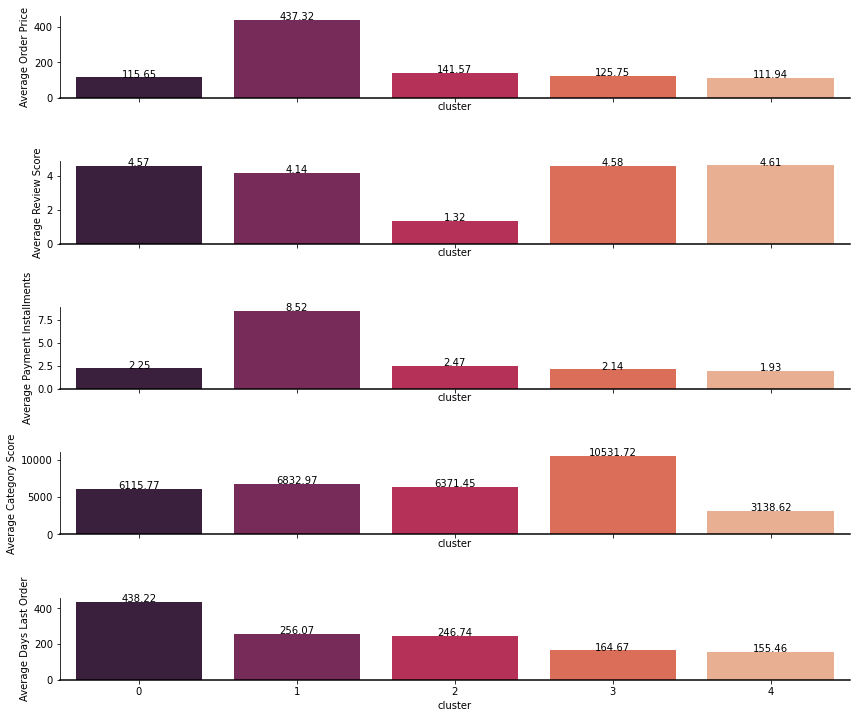

In [8]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

a=sns.barplot(y="avg_order_price", x="cluster", data=new_clusters, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Order Price")
for index, row in new_clusters.iterrows():
    a.text(row.cluster,row.avg_order_price, round(row.avg_order_price,2), color='black', ha="center")

b=sns.barplot(y="avg_review_score", x="cluster", data=new_clusters, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Average Review Score")
for index, row in new_clusters.iterrows():
    b.text(row.cluster,row.avg_review_score, round(row.avg_review_score,2), color='black', ha="center")

c=sns.barplot(y="avg_payment_installments", x="cluster", data=new_clusters, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Average Payment Installments")
for index, row in new_clusters.iterrows():
    c.text(row.cluster,row.avg_payment_installments, round(row.avg_payment_installments,2), color='black', ha="center")

d=sns.barplot(y="avg_category_score", x="cluster", data=new_clusters, palette="rocket", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Average Category Score")
for index, row in new_clusters.iterrows():
    d.text(row.cluster,row.avg_category_score, round(row.avg_category_score,2), color='black', ha="center")

e=sns.barplot(y="avg_days_last_order", x="cluster", data=new_clusters, palette="rocket", ax=ax5)
ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylabel("Average Days Last Order")
for index, row in new_clusters.iterrows():
    e.text(row.cluster,row.avg_days_last_order, round(row.avg_days_last_order,2), color='black', ha="center")

sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

### Personnes types 

Passons en revue tous nos clusters et analysons leurs comportements :

- **Cluster 0 : L'Econome (22%)** 

Pour ce groupe le client a un montant de commande putôt faible, il laisse une très bonne note, paye en peu de fois, sur des catégories de produits courantes, mais, il commande rarement. Ces critères laissent entendre que le client est patient et attend la bonne affaire qui lui coutera pas trop cher.


- **Cluster 1 : Le Prévoyant (12%)** 

Nous avons dans ce groupe des clients ayant des montants moyen de commandes élevés, qui laissent un bon avis, qui payent en beaucoup de fois (plus de 8 fois en moyenne), achètent des catégories de produits courantes et ne commandent pas souvent. La particularité de ce type de client est qu'il commande pour de gros montants et paye en plusieurs fois. 


- **Cluster 2 : l'Insatisfait (14%)** 

Ces clients commandes pour des sommes moyennes, ne laissent pas de bon avis clients, payent en peu d'échéances sur des catégories de produits courantes, de plus ils ne commandent pas souvent. Ce qui les démarque ici est leur note moyenne d'avis client qui est très faible.


- **Cluster 3 : Le Fidèle (25%)** 

Ici les clients achètent pour des montants corrects, laissent des bons avis, payent en peu de fois, achètent les catégories de produits les plus vendues et commandent de manière assez fréquente. Ce sont clairement des clients actifs, qui aiment acheter et regarder régulièrement les nouveaux produits.


- **Cluster 4 : L'Opportuniste (28%)** 

Ce groupe de client a le montant moyen de commande le plus faible, il a cependant des bonnes notes sur les avis clients, paye en très peu de d'échéance, a la particularité de commander des catégories de produits moins courantes, mais est le cluster qui commande le plus souvent. Les clients ici cherchent des produits plus originaux et sont toujours actifs et dans les bonnes affaires.

## Maintenance de l'algorithme

Afin de pouvoir faire une proposition de contrat de maintenance, nous devons étudier les performances de notre algorithme à différents moments dans le temps afin de pouvoir estimer la fréquence de la maintenance nécessaire pour les bonnes performances de la segmentation. 

Nous allons donc séparer nortre algorithme en plusieurs DataFrames de périodes plus courtes pour voir son évolution au fil du temps. 

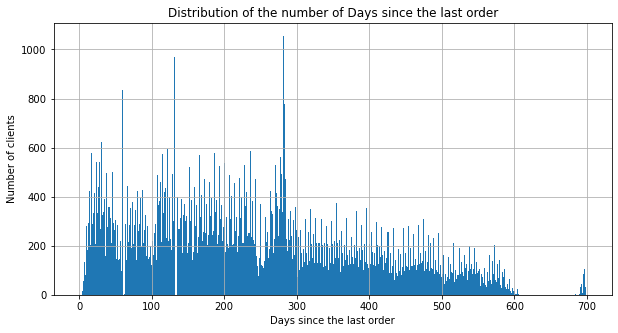

In [16]:
f, ax = plt.subplots(figsize=(10,5))
plt.title('Distribution of the number of Days since the last order')
plt.xlabel('Days since the last order')
plt.ylabel('Number of clients')
ax = data_clust.last_order.hist(bins=500)

In [64]:
df_3mois = data_clust.loc[data_clust.last_order <= 91]
df_6mois = data_clust.loc[data_clust.last_order <= 182]
df_9mois = data_clust.loc[data_clust.last_order <= 273]
df_12mois = data_clust.loc[data_clust.last_order <= 365]
df_15mois = data_clust.loc[data_clust.last_order <= 456]
df_18mois = data_clust.loc[data_clust.last_order <= 547]

print("df_3mois shape :", df_3mois.shape)
print("df_6mois shape :", df_6mois.shape)
print("df_9mois shape :", df_9mois.shape)
print("df_12mois shape :", df_12mois.shape)
print("df_15mois shape :", df_15mois.shape)
print("df_18mois shape :", df_18mois.shape)

df_3mois shape : (18251, 6)
df_6mois shape : (38356, 6)
df_9mois shape : (57612, 6)
df_12mois shape : (73750, 6)
df_15mois shape : (84607, 6)
df_18mois shape : (92940, 6)


Nous avons maintenant séparé notre dataframe en périodes différentes, variant de 3 mois à chaque fois, regardons les valeurs de cluster que nous obtiendrions avec ceux-cis pour voir s'ils varient entre eux. 

Nous allons pouvoir étudier les variations avec les métriques de **SKlearn : adjusted_rand_score & adjusted_mutual_info_score**.

In [65]:
data3 = scaler.fit_transform(df_3mois.iloc[:,:5])
data6 = scaler.fit_transform(df_6mois.iloc[:,:5])
data9 = scaler.fit_transform(df_9mois.iloc[:,:5])
data12 = scaler.fit_transform(df_12mois.iloc[:,:5])
data15 = scaler.fit_transform(df_15mois.iloc[:,:5])
data18 = scaler.fit_transform(df_18mois.iloc[:,:5])

data3_pred = clustering.predict(data3)
data6_pred = clustering.predict(data6)
data9_pred = clustering.predict(data9)
data12_pred = clustering.predict(data12)
data15_pred = clustering.predict(data15)
data18_pred = clustering.predict(data18)

In [66]:
maintenance = pd.DataFrame(columns=["metric","3mois","6mois","9mois","12mois","15mois","18mois","24mois"])
maintenance.metric = ["Adjusted Rand Index", "Adjusted Mutual Information"]
maintenance

,metric,3mois,6mois,9mois,12mois,15mois,18mois,24mois
0,Adjusted Rand Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Adjusted Mutual Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
maintenance.iloc[0][7] = adjusted_rand_score(data_clust.cluster, data_clust.cluster)
maintenance.iloc[1][7] = adjusted_mutual_info_score(data_clust.cluster, data_clust.cluster)

maintenance.iloc[0][6] = adjusted_rand_score(df_18mois.cluster, data18_pred)
maintenance.iloc[1][6] = adjusted_mutual_info_score(df_18mois.cluster, data18_pred)

maintenance.iloc[0][5] = adjusted_rand_score(df_15mois.cluster, data15_pred)
maintenance.iloc[1][5] = adjusted_mutual_info_score(df_15mois.cluster, data15_pred)

maintenance.iloc[0][4] = adjusted_rand_score(df_12mois.cluster, data12_pred)
maintenance.iloc[1][4] = adjusted_mutual_info_score(df_12mois.cluster, data12_pred)

maintenance.iloc[0][3] = adjusted_rand_score(df_9mois.cluster, data9_pred)
maintenance.iloc[1][3] = adjusted_mutual_info_score(df_9mois.cluster, data9_pred)

maintenance.iloc[0][2] = adjusted_rand_score(df_6mois.cluster, data6_pred)
maintenance.iloc[1][2] = adjusted_mutual_info_score(df_6mois.cluster, data6_pred)

maintenance.iloc[0][1] = adjusted_rand_score(df_3mois.cluster, data3_pred)
maintenance.iloc[1][1] = adjusted_mutual_info_score(df_3mois.cluster, data3_pred)

In [71]:
maintenance.iloc[:,0]

0            Adjusted Rand Index
1    Adjusted Mutual Information
Name: metric, dtype: object

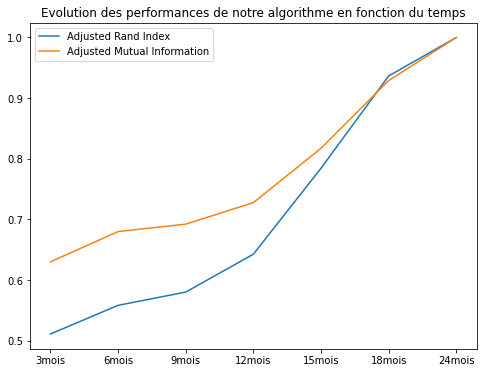

In [73]:
f,ax = plt.subplots(figsize=(8,6))
plt.title("Evolution des performances de notre algorithme en fonction du temps")
ax.plot(maintenance.iloc[0,1:], color='tab:blue')
ax.plot(maintenance.iloc[1,1:], color='tab:orange')
plt.legend(maintenance.iloc[:,0])
plt.show()

Nous observons que plus l'intervalle de données diminue et plus l'algorithme perd en précision. Nous remarquons ici qu'avec un historique de données clients de 15 mois nous restons autour de 0.8 sur nos deux métriques *adjusted_rand_score & adjusted_mutual_info_score*. C'est donc 9 mois après nos données originales qui corespondent à 24 mois. 

Nous préconisons donc une mise à jour de l'algorithme tous les **9 mois** pour garder la segmentation la plus performante possible afin que notre client puisse rester compétitif dans la communication de ses offres aux différentes cibes que nous avons obtenu. 

Cette mise à jour devrait prendre une demi-journée de travail pour un Data Scientist, soit 4h au tarif moyen de 800€ de l'heure, ce qui nous fait un total de **3200€ tous les 9 mois**.